# Rempah Rasa: Indonesian Food Recipes Preprocessing & EDA

**Dataset: Indonesian Food Recipes (https://www.kaggle.com/datasets/canggih/indonesian-food-recipes)**

In [1]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# 1. Data Loading

In [2]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"albertnathaniel12","key":"26a0c7ba67b423ed4719b9e00a06612d"}'}

In [3]:
!pip install -q kaggle

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d canggih/indonesian-food-recipes

Dataset URL: https://www.kaggle.com/datasets/canggih/indonesian-food-recipes
License(s): CC0-1.0
  0% 0.00/3.63M [00:00<?, ?B/s]
100% 3.63M/3.63M [00:00<00:00, 62.6MB/s]


In [6]:
!unzip indonesian-food-recipes.zip

Archive:  indonesian-food-recipes.zip
  inflating: dataset-ayam.csv        
  inflating: dataset-ikan.csv        
  inflating: dataset-kambing.csv     
  inflating: dataset-sapi.csv        
  inflating: dataset-tahu.csv        
  inflating: dataset-telur.csv       
  inflating: dataset-tempe.csv       
  inflating: dataset-udang.csv       


In [7]:
csv_files = ['dataset-ayam.csv', 'dataset-ikan.csv', 'dataset-kambing.csv', 'dataset-sapi.csv', 'dataset-tahu.csv', 'dataset-telur.csv', 'dataset-tempe.csv', 'dataset-udang.csv']
dfs = []

for file in csv_files:
    category = file.split('-')[1].split('.')[0]
    df = pd.read_csv(file)
    df['Category'] = category
    dfs.append(df)

df_recipes = pd.concat(dfs, ignore_index=True)
df_recipes

,Title,Ingredients,Steps,Loves,URL,Category
0,Ayam Woku Manado,1 Ekor Ayam Kampung (potong 12)--2 Buah Jeruk ...,Cuci bersih ayam dan tiriskan. Lalu peras jeru...,1,/id/resep/4473027-ayam-woku-manado,ayam
1,Ayam goreng tulang lunak,1 kg ayam (dipotong sesuai selera jangan kecil...,"Haluskan bumbu2nya (BaPut, ketumbar, kemiri, k...",1,/id/resep/4471956-ayam-goreng-tulang-lunak,ayam
2,Ayam cabai kawin,1/4 kg ayam--3 buah cabai hijau besar--7 buah ...,Panaskan minyak di dalam wajan. Setelah minyak...,2,/id/resep/4473057-ayam-cabai-kawin,ayam
3,Ayam Geprek,250 gr daging ayam (saya pakai fillet)--Secuku...,Goreng ayam seperti ayam krispi--Ulek semua ba...,10,/id/resep/4473023-ayam-geprek,ayam
4,Minyak Ayam,400 gr kulit ayam & lemaknya--8 siung bawang p...,Cuci bersih kulit ayam. Sisihkan--Ambil 50 ml ...,4,/id/resep/4427438-minyak-ayam,ayam
...,...,...,...,...,...,...
15636,Udang saus mentega,1 kg udang segar--1 buah bawang bombay kecil--...,"Bersihkan udang, siapkan bahan bahan--Tumis ba...",46,/id/resep/3794442-udang-saus-mentega,udang
15637,Jipang tumis udang,500 gr jipang(saya pk 6bh jipang muda yg kecil...,Tumis bawang merah bawang putih hingga harum.-...,6,/id/resep/3795267-jipang-tumis-udang,udang
15638,Tumis Udang Tempe,3 siung bawang merah--3 siung bawang putih--2 ...,"Tiriskan bawang putih, bawang merah dan cabe l...",3,/id/resep/3794945-tumis-udang-tempe,udang
15639,Tumis kacang panjang terong udang,"Stgah ikat kacang panjang,ku bli 3ribu d psr--...","Potong2 kacang panjang,terong cuci bersih sisi...",12,/id/resep/3794623-tumis-kacang-panjang-terong-...,udang


# 2. Data Preprocessing

## 2.1 Data Formatting

### 2.1.1 Check Column and Data Type

In [8]:
df_recipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15641 entries, 0 to 15640
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        15641 non-null  object
 1   Ingredients  15593 non-null  object
 2   Steps        15595 non-null  object
 3   Loves        15641 non-null  int64 
 4   URL          15641 non-null  object
 5   Category     15641 non-null  object
dtypes: int64(1), object(5)
memory usage: 733.3+ KB


### 2.1.2 Check Missing Value

In [9]:
missing_values = df_recipes.isnull().sum()
total_missing = missing_values.sum()

print("Number of Missing Values:", total_missing)
print(missing_values)

Number of Missing Values: 94
Title           0
Ingredients    48
Steps          46
Loves           0
URL             0
Category        0
dtype: int64


In [10]:
total_cells = np.product(df_recipes.shape)
percent_missing = (total_missing/total_cells) * 100

print("Missing Values Percentage:", percent_missing, "%")

Missing Values Percentage: 0.10016409862966989 %


In [11]:
df_missing = df_recipes[df_recipes.isnull().any(axis=1)]
df_missing.head()

,Title,Ingredients,Steps,Loves,URL,Category
255,[Notitle],NaN,NaN,0,/id/resep/4459283-ayam-bakar,ayam
258,[Notitle],NaN,NaN,0,/id/resep/4458951-sate-ayam-maknyusss,ayam
298,[Notitle],NaN,NaN,0,/id/resep/4454787-garang-asam-ayam-kampung,ayam
302,[Notitle],NaN,NaN,0,/id/resep/4454903-ayam-kremes,ayam
464,[Notitle],NaN,NaN,0,/id/resep/4444134-ayam-balado-simple,ayam


In [12]:
df_recipes = df_recipes.dropna(axis = 0).reset_index(drop = True)
df_recipes

,Title,Ingredients,Steps,Loves,URL,Category
0,Ayam Woku Manado,1 Ekor Ayam Kampung (potong 12)--2 Buah Jeruk ...,Cuci bersih ayam dan tiriskan. Lalu peras jeru...,1,/id/resep/4473027-ayam-woku-manado,ayam
1,Ayam goreng tulang lunak,1 kg ayam (dipotong sesuai selera jangan kecil...,"Haluskan bumbu2nya (BaPut, ketumbar, kemiri, k...",1,/id/resep/4471956-ayam-goreng-tulang-lunak,ayam
2,Ayam cabai kawin,1/4 kg ayam--3 buah cabai hijau besar--7 buah ...,Panaskan minyak di dalam wajan. Setelah minyak...,2,/id/resep/4473057-ayam-cabai-kawin,ayam
3,Ayam Geprek,250 gr daging ayam (saya pakai fillet)--Secuku...,Goreng ayam seperti ayam krispi--Ulek semua ba...,10,/id/resep/4473023-ayam-geprek,ayam
4,Minyak Ayam,400 gr kulit ayam & lemaknya--8 siung bawang p...,Cuci bersih kulit ayam. Sisihkan--Ambil 50 ml ...,4,/id/resep/4427438-minyak-ayam,ayam
...,...,...,...,...,...,...
15588,Udang saus mentega,1 kg udang segar--1 buah bawang bombay kecil--...,"Bersihkan udang, siapkan bahan bahan--Tumis ba...",46,/id/resep/3794442-udang-saus-mentega,udang
15589,Jipang tumis udang,500 gr jipang(saya pk 6bh jipang muda yg kecil...,Tumis bawang merah bawang putih hingga harum.-...,6,/id/resep/3795267-jipang-tumis-udang,udang
15590,Tumis Udang Tempe,3 siung bawang merah--3 siung bawang putih--2 ...,"Tiriskan bawang putih, bawang merah dan cabe l...",3,/id/resep/3794945-tumis-udang-tempe,udang
15591,Tumis kacang panjang terong udang,"Stgah ikat kacang panjang,ku bli 3ribu d psr--...","Potong2 kacang panjang,terong cuci bersih sisi...",12,/id/resep/3794623-tumis-kacang-panjang-terong-...,udang


### 2.1.3 Check Duplicate Data

In [13]:
duplicate_rows = df_recipes.duplicated().sum()
print ("Number of Duplicate Rows:", duplicate_rows)

Number of Duplicate Rows: 0


In [14]:
df_duplicate_url = df_recipes[df_recipes.duplicated(subset='URL', keep=False)]
df_duplicate_url

,Title,Ingredients,Steps,Loves,URL,Category
79,"Semur Ati Ayam, Telur Puyuh, Tahu","5 buah ati ayam, cuci bersih--6 Butir telur pu...","Panaskan minyak goreng. Tumis bumbu halus,sala...",6,/id/resep/199996-semur-ati-ayam-telur-puyuh-tahu,ayam
87,Siomay Ayam Udang,"150 gr ayam, blender--150 gr udang cincang kas...",Campur semua bahan aduk rata.--Oles minyak kul...,6,/id/resep/4468094-siomay-ayam-udang,ayam
101,Ayam Dan Tempe Goreng Serundeng,1 dada ayam--1/2 kelapa parut--2 tempe (potong...,"Setelah ayam dicuci bersih, didihkan air. Masu...",1,/id/resep/4467442-ayam-dan-tempe-goreng-serundeng,ayam
143,Tahu ayam udang,3 bh Tahu cina putih--100 gr udang dikupas--20...,Potong tahu--Siapkan udang dan ayam--Haluskan ...,5,/id/resep/4466174-tahu-ayam-udang,ayam
156,"Semur Ayam, Tahu, Kentang",1/4 kg Sayap ayam--2 buah kentang sedang--1 ko...,Haluskan bawang merah dan bawang putih. Tumis ...,5,/id/resep/4465474-semur-ayam-tahu-kentang,ayam
...,...,...,...,...,...,...
15077,Telur balado kentang + udang,1/4 telur (rebus)--1/4 kentang (pot kotak gore...,"Rebus telur hingga matang,, kentang kupas (gor...",6,/id/resep/3929365-telur-balado-kentang-udang,udang
15105,Sambal lado telur puyu terong udang,10 btih telur puyu--semper empat udang--1 buah...,Rebus telur puyuh kups sisikn--Berdikn udang d...,11,/id/resep/3923379-sambal-lado-telur-puyu-teron...,udang
15186,Rolade Telur Udang Saus Asam Manis,2 butir telur--1/2 batang wortel--2-3 batang d...,"Campur telur, daun bawang, serta wortel yg sud...",5,/id/resep/3897493-rolade-telur-udang-saus-asam...,udang
15203,Udang bungkus telur,1/4 udang--5 butir telur--1/6 kol--daun bawang...,Dadar telur secukupnya untuk bungkus--Oseng ba...,13,/id/resep/3893075-udang-bungkus-telur,udang


In [15]:
df_recipes = df_recipes.drop_duplicates(subset='URL', keep='last').reset_index(drop = True)
df_recipes_copy = df_recipes
df_recipes

,Title,Ingredients,Steps,Loves,URL,Category
0,Ayam Woku Manado,1 Ekor Ayam Kampung (potong 12)--2 Buah Jeruk ...,Cuci bersih ayam dan tiriskan. Lalu peras jeru...,1,/id/resep/4473027-ayam-woku-manado,ayam
1,Ayam goreng tulang lunak,1 kg ayam (dipotong sesuai selera jangan kecil...,"Haluskan bumbu2nya (BaPut, ketumbar, kemiri, k...",1,/id/resep/4471956-ayam-goreng-tulang-lunak,ayam
2,Ayam cabai kawin,1/4 kg ayam--3 buah cabai hijau besar--7 buah ...,Panaskan minyak di dalam wajan. Setelah minyak...,2,/id/resep/4473057-ayam-cabai-kawin,ayam
3,Ayam Geprek,250 gr daging ayam (saya pakai fillet)--Secuku...,Goreng ayam seperti ayam krispi--Ulek semua ba...,10,/id/resep/4473023-ayam-geprek,ayam
4,Minyak Ayam,400 gr kulit ayam & lemaknya--8 siung bawang p...,Cuci bersih kulit ayam. Sisihkan--Ambil 50 ml ...,4,/id/resep/4427438-minyak-ayam,ayam
...,...,...,...,...,...,...
14940,Udang saus mentega,1 kg udang segar--1 buah bawang bombay kecil--...,"Bersihkan udang, siapkan bahan bahan--Tumis ba...",46,/id/resep/3794442-udang-saus-mentega,udang
14941,Jipang tumis udang,500 gr jipang(saya pk 6bh jipang muda yg kecil...,Tumis bawang merah bawang putih hingga harum.-...,6,/id/resep/3795267-jipang-tumis-udang,udang
14942,Tumis Udang Tempe,3 siung bawang merah--3 siung bawang putih--2 ...,"Tiriskan bawang putih, bawang merah dan cabe l...",3,/id/resep/3794945-tumis-udang-tempe,udang
14943,Tumis kacang panjang terong udang,"Stgah ikat kacang panjang,ku bli 3ribu d psr--...","Potong2 kacang panjang,terong cuci bersih sisi...",12,/id/resep/3794623-tumis-kacang-panjang-terong-...,udang


### 2.1.4 Check Unique Value

In [16]:
print("Number of Unique Values in Each Column:")
for column in df_recipes.columns:
    unique_values = len(df_recipes[column].unique())
    print(f"{column} : {unique_values} unique values")

Number of Unique Values in Each Column:
Title : 12468 unique values
Ingredients : 14939 unique values
Steps : 14940 unique values
Loves : 184 unique values
URL : 14945 unique values
Category : 8 unique values


## 2.2 Data Cleansing

### 2.2.1 Clean Data in Title Column

In [17]:
df_title = pd.DataFrame(df_recipes['Title'])
df_title

,Title
0,Ayam Woku Manado
1,Ayam goreng tulang lunak
2,Ayam cabai kawin
3,Ayam Geprek
4,Minyak Ayam
...,...
14940,Udang saus mentega
14941,Jipang tumis udang
14942,Tumis Udang Tempe
14943,Tumis kacang panjang terong udang


In [18]:
def clean_title(text):
    text = text.split('#', 1)[0].strip()
    text = text.lower()
    text = text.replace('1st', 'first')
    text = text.replace('nuttget', 'nugget')
    text = re.sub(r'1y', 'one year+', text)
    text = re.sub(r'code001', '', text)
    text = re.sub(r'[^\w\s&()"+/]', ' ', text)
    text = re.sub(r'\d+', '', text)
    emoticon_pattern = re.compile("["
                                   u"\U0001F600-\U0001F64F"  # emoticon
                                   u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                                   u"\U0001F680-\U0001F6FF"  # transport & map symbols
                                   u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                                   u"\U00002702-\U000027B0"  # other symbols
                                   u"\U000024C2-\U0001F251"
                                   "]+", flags=re.UNICODE)
    text = emoticon_pattern.sub(r'', text)
    text = re.sub(r'\s+', ' ', text).strip()

    words = word_tokenize(text)
    stop_words = set(stopwords.words('indonesian'))
    stop_words.update(['usia', 'thn'])
    stop_words.discard('tahu')
    stop_words.discard('panjang')
    cleaned_words = [word for word in words if word not in stop_words]
    cleaned_text = ' '.join(cleaned_words)

    return cleaned_text

In [19]:
df_title_cleaned = df_title
df_title_cleaned['Title'] = df_title_cleaned['Title'].apply(clean_title)
df_title_cleaned

,Title
0,ayam woku manado
1,ayam goreng tulang lunak
2,ayam cabai kawin
3,ayam geprek
4,minyak ayam
...,...
14940,udang saus mentega
14941,jipang tumis udang
14942,tumis udang tempe
14943,tumis kacang panjang terong udang


In [20]:
df_recipes['Title Cleaned'] = df_title_cleaned['Title']
df_recipes

,Title,Ingredients,Steps,Loves,URL,Category,Title Cleaned
0,Ayam Woku Manado,1 Ekor Ayam Kampung (potong 12)--2 Buah Jeruk ...,Cuci bersih ayam dan tiriskan. Lalu peras jeru...,1,/id/resep/4473027-ayam-woku-manado,ayam,ayam woku manado
1,Ayam goreng tulang lunak,1 kg ayam (dipotong sesuai selera jangan kecil...,"Haluskan bumbu2nya (BaPut, ketumbar, kemiri, k...",1,/id/resep/4471956-ayam-goreng-tulang-lunak,ayam,ayam goreng tulang lunak
2,Ayam cabai kawin,1/4 kg ayam--3 buah cabai hijau besar--7 buah ...,Panaskan minyak di dalam wajan. Setelah minyak...,2,/id/resep/4473057-ayam-cabai-kawin,ayam,ayam cabai kawin
3,Ayam Geprek,250 gr daging ayam (saya pakai fillet)--Secuku...,Goreng ayam seperti ayam krispi--Ulek semua ba...,10,/id/resep/4473023-ayam-geprek,ayam,ayam geprek
4,Minyak Ayam,400 gr kulit ayam & lemaknya--8 siung bawang p...,Cuci bersih kulit ayam. Sisihkan--Ambil 50 ml ...,4,/id/resep/4427438-minyak-ayam,ayam,minyak ayam
...,...,...,...,...,...,...,...
14940,Udang saus mentega,1 kg udang segar--1 buah bawang bombay kecil--...,"Bersihkan udang, siapkan bahan bahan--Tumis ba...",46,/id/resep/3794442-udang-saus-mentega,udang,udang saus mentega
14941,Jipang tumis udang,500 gr jipang(saya pk 6bh jipang muda yg kecil...,Tumis bawang merah bawang putih hingga harum.-...,6,/id/resep/3795267-jipang-tumis-udang,udang,jipang tumis udang
14942,Tumis Udang Tempe,3 siung bawang merah--3 siung bawang putih--2 ...,"Tiriskan bawang putih, bawang merah dan cabe l...",3,/id/resep/3794945-tumis-udang-tempe,udang,tumis udang tempe
14943,Tumis kacang panjang terong udang,"Stgah ikat kacang panjang,ku bli 3ribu d psr--...","Potong2 kacang panjang,terong cuci bersih sisi...",12,/id/resep/3794623-tumis-kacang-panjang-terong-...,udang,tumis kacang panjang terong udang


### 2.2.2 Clean Data in Ingredients Column

In [21]:
df_ingredients = pd.DataFrame(df_recipes['Ingredients'])
df_ingredients

,Ingredients
0,1 Ekor Ayam Kampung (potong 12)--2 Buah Jeruk ...
1,1 kg ayam (dipotong sesuai selera jangan kecil...
2,1/4 kg ayam--3 buah cabai hijau besar--7 buah ...
3,250 gr daging ayam (saya pakai fillet)--Secuku...
4,400 gr kulit ayam & lemaknya--8 siung bawang p...
...,...
14940,1 kg udang segar--1 buah bawang bombay kecil--...
14941,500 gr jipang(saya pk 6bh jipang muda yg kecil...
14942,3 siung bawang merah--3 siung bawang putih--2 ...
14943,"Stgah ikat kacang panjang,ku bli 3ribu d psr--..."


In [22]:
df_recipes['Total Ingredients'] = df_recipes['Ingredients'].str.count('--')

In [23]:
def clean_ingredients(text):
    text = text.lower()
    link_pattern = re.compile(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    text = link_pattern.sub(r'', text)
    text = text.replace('--', ',')
    text = re.sub(r':', ' ', text)
    text = text.replace('minya', 'minyak')
    text = text.replace('minyakk', 'minyak')
    text = re.sub(r'\d+|\s+|\-|\/|\(|\)|\*|\=|\×|\^|\@|\;|\%|\`', ' ', str(text))
    text = re.sub(r"[']", '', text)
    text = re.sub(r'\(.*?\)', '', text)
    text = text.replace('.', '')
    emoticon_pattern = re.compile("["
                                   u"\U0001F600-\U0001F64F"  # emoticon
                                   u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                                   u"\U0001F680-\U0001F6FF"  # transport & map symbols
                                   u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                                   u"\U00002702-\U000027B0"  # other symbols
                                   u"\U000024C2-\U0001F251"
                                   "]+", flags=re.UNICODE)
    text = emoticon_pattern.sub(r'', text)
    text = re.sub(r'\b(?:\d+|\s+|\-|\/|kg|g|gram|grams|kilogram|gr|grm|lmbar|lmbr|lembar|lbr|serbaguna|siung|ruas|jari|bungkus|buah|instan uk \+ campur tepung terigu|jdyg bsah\. beli pasaraku beli rb cm|ekr|ne i cuci bersih ptng air jeruk nipis cuci lagi|ekor|ml|sdm|adonan basah|sdt|iris|sck|menggoreng|proteiin tinggi|sejimpit)\b', ' ', str(text))
    text = re.sub(r'\b(?:¹ ²|¹ ⁴|cm|butir|btr|liter|l|cc|aja|ya|pk|yah|gelas|sdth|sdteh|isdt|dr|bsah|secukupnyaa|sebentr|z|sih|sdkit|secukupnyal|sckpnya|pcs|sachet|optional|ons|dibanyakan|sesuai|selera|cuci|kaka|ikat|seikat|dicuci|mencuci|beli|rb|jd|yg|pasar|dipasar|bh|air merebus mie|cuci bersih|tbs|helai|lmb|bersih|ruah|seujung)\b', ' ', text)
    text = re.sub(r'\b(?:ukuran|uk|a|kating|sesuaikan|disesuaikan|bahan|utama|sbtr|pelapis|dibeli|krg|indomar t|scroll|bu|akuu|bks|opsional|st|cup|sendok teh|sendok makan|gak|pakai|nggak|sy|skip|x|ku|bli|d|psr|ribu|stgah|sisa kulkas ja|setagah|lb|terserah|sich|sendok air|sm air|sndok teh|tablespoon|secukupny|segenggam|serantang|seruas|setenfah|sendok)\b', ' ', text)
    text = re.sub(r'secukupnya', '', text)
    text = re.sub(r'tergantung', '', text)
    text = re.sub(r'\s*,\s*', ',', text)
    text = re.sub(r',+', ',', text)
    text = re.sub(r'^,|,$', '', text)
    text = re.sub(r'\s+', ' ', text).strip()

    words = word_tokenize(text)
    stop_words = set(stopwords.words('indonesian'))
    stop_words.discard('tahu')
    stop_words.discard('panjang')
    stop_words.discard('atas')
    cleaned_words = [word for word in words if word not in stop_words]
    cleaned_text = ' '.join(cleaned_words)

    return cleaned_text

def clean_ingredients_2(text):
    text = re.sub(r', , ,', ',', text)
    text = re.sub(r', ,', ',', text)
    text = re.sub(r',+', ',', text)
    text = re.sub(r'^,|,$', '', text)
    text = re.sub(r'\bbwg\b|\bbwng\b|\bbawng\b|\bbwang\b|\bbawanh\b', 'bawang', text)
    text = re.sub(r'\bpth\b|\bptih\b|\bputh\b', 'putih', text)
    text = re.sub(r'\bmrh\b|\bmerh\b|\bmrah\b', 'merah', text)
    text = re.sub(r'\bbombay\b|\bbombang\b', 'bombai', text)
    text = re.sub(r'\badas manis\b|\badas haluskan\b|\badas bubuk\b|\badas manis bubuk\b|\bsejumput adas wangi\b|\badas sangrai\b|\badas disangrai\b', 'adas', text)
    text = re.sub(r'\b(?:andaliman buang tangkai)\b', 'andaliman', text)
    text = re.sub(r'\b(?:biji asem jawa|air asem jawa|mata asem jawa|asem jawa|biji asam jawa|air asam jawa)\b', 'asam jawa', text)
    text = re.sub(r'\b(?:bputih|bawang p|garlic|garlic bawang putih|baput)\b', 'bawang putih', text)
    text = re.sub(r'\b(?:bmerah|bawang m|red onion)\b', 'bawang merah', text)
    text = re.sub(r'\b(?:bbombay|bawangbombay|bawbombay|bombai onion|bombay onion)\b', 'bawang bombai', text)
    text = re.sub(r'\b(?:ketumbar haluskan|ketumbar bubuk|peres ketumbar|sejumput ketumbar|jumput ketumbar|ketumbar sangrai|ketumbar halus|ketubar bubuk|ketmbar sangrai|coriander ketumbar tumbuk|coriander powder ketumbar|coriander powder|corriender seeds)\b', 'biji ketumbar', text)
    text = re.sub(r'\b(?:star anise|kembang lawang|bunga pekak bunga lawang star anise|biji bunga lawang bintang uleg|biji bunga lawang kering|biji bunga lawang|pekak bunga lawang star anise|bunga lawang pekak|kuntum bunga lawang|kelopak bunga lawang|bunga lawang anis star|bintang bunga lawang|staranish peka)\b', 'bunga lawang', text)
    text = re.sub(r'\b(?:cengke|cengkih|biji cengkeh|rempah cengkeh|bj cengkeh|cengkeh sangrai|cengkeh disangrai|biji cengkih|cengkih sangrai|bj cengkih|cloves|clove cengkeh|cloves cloves cengkeh)\b', 'cengkeh', text)
    text = re.sub(r'\b(?:daun jeruk purut|daun jeruk disobek|daun jeruk pake ngga bebas|lime leaves daun jeruk|daun jeruj)\b', 'daun jeruk', text)
    text = re.sub(r'\b(?:lalapan kemangi|daun kemangi petik daun nya|iket kemangi|genggam kemangi|kemangi siangi|genggam daun kemangi|daun kemangi kering|daun basil|basil|basil kering|sejumput basil)\b', 'daun kemangi', text)
    text = re.sub(r'\b(?:tambahan daun ketumbar|batang daun ketumbar potong kasar|batang daun ketumbar beserta akarnya)\b', 'daun ketumbar', text)
    text = re.sub(r'\b(?:daun salam pake|daun salam alas adonan|salam koja bay leaves|daun bay daun salam|bayleaf|bay leaf diganti daun salam|bay leave daun salam|daun salam bay leaves|bay leave|bay leaves daun salam|bayleaves|bayleaf diganti dgn daun salam kering|daun salam kering)\b', 'daun salam', text)
    text = re.sub(r'\b(?:jahe geprek|jahe halus|jahe cincang halus|jahe giling halus|jahe bubuk|ginger jahe|ginger paste|jahe ginger paste|finger ginger make paste|ginger|jahe dewasa)\b', 'jahe', text)
    text = re.sub(r'\b(?:jintan|jinten sejumput|jinten bubuk|jinten sangrai|jumput cubit jinten|sedikitttt jinten|bubuk jinten|jumput jinten|sejumput jinten|jintan sejumput|sejumput jintan|jintan bubuk|jintan sangrai|jumput cumin jinten|jumput jinten cumin|cumin jinten|cumin powder|munjung cuminpowder|cumin powder jinten|cumin seeds|cumin)\b', 'jinten', text)
    text = re.sub(r'\b(?:bunga kapulaga|kapulaga pekak|kapulaga hijau|kapulaga india|kapulaga putih|bj kapulaga|biji kapulaga|bubuk kapulaga|kapulaga bubuk|kapulaga sangrai|kapulaga disangrai|biji kapulaga diuleg|cardamom kapulaga hijau|biji cardamom kapulaga|kapulaga arab utuh cardamom butiran hijau|cardamom kapulaga|cardamom)\b', 'kapulaga', text)
    text = re.sub(r'\b(?:rias kayu manis|batang kayu manis|batang kayu manis utuh|kelingking kayu manis|mesoi kayu manis|kayu manis geprek|cinamon|cinnamon bubuk|batang cinnamon kayumanis|stick cinnamon|sticks cinnamon|stik cinnamon|batang kayu manis cinnamon|batang cinnamon|kayumanis)\b', 'kayu manis', text)
    text = re.sub(r'\b(?:pekak kembang secang star anis sangrai)\b', 'kayu secang', text)
    text = re.sub(r'\b(?:kemiri haluskan|kemiri sangrai|biji kemiri|kemiri diwarung nya an|kemiri utuh|kemiri goreng)\b', 'kemiri', text)
    text = re.sub(r'\b(?:indonesia dsebut kemukus ato lada jawa)\b', 'kemukus', text)
    text = re.sub(r'\b(?:kencur bubuk|kencur pake banget|bubuk kencur|kencur pilih|kencur haluskan|kelingking kencur|seujung kencur|jempol kencur|ptg kencur)\b', 'kencur', text)
    text = re.sub(r'\b(?:kluwek pecahkan|kluwek pucung keluarkan isinya rendam dgn air panas|biji kluwek|daging kluwek rendam air panas|kluwek kluak|biji kluwek pecahkan|kluwek pecahkan ambil dalamnya|kluwek isinya|kluwek rebus ambil dagingnya|kluwek pastikan pilih tua biar pahit|kluwek ambil isinya rendam air panas|kluwek isi rendam air panas|kluwek ambil isinya|kluwek geprak kulit kerasnya ambil isinya|biji kluwek tes pilih pahit seduh air panas)\b', 'kluwek', text)
    text = re.sub(r'\b(?:turmeric powder|kunyit haluskan|kunyit halus|kunyit bubuk|kunyit geprek|kunyit bubuk kunyit|kunyit kunyit|kunyit jempol|kunyit bakar|bumbu kunyit|bumbu kunyit desaku bumbu kunyit|kunyit kupas kulitnya)\b', 'kunyit', text)
    text = re.sub(r'\b(?:lada bubuk|lada halus|lada hitam bubuk|lada bubuk lada hitam|lada putih bubuk|lada lada bubuk jg bs|lada hitam butiran digerus|lada garam r o|ladah bubuk|lada hitam ulek halus|saset lada bubuk|lada kasar|sendok lada bubuk|ladah|lads bubuk)\b', 'lada', text)
    text = re.sub(r'\b(?:lengkuas geprek|lengkuas halus|lengkuas jempol kaki|lengkuas parut|lengkuas diparut|lengkuas digeprek|lengkuas kupas kulitnya|lengkuasgeprek|lengkuas memarkan|lengkuas dewasa|galangal lengkuas|lengkuas sekepalan tangan)\b', 'lengkuas', text)
    text = re.sub(r'\b(?:biji pala|pala bubuk|sejumput pala bubuk|biji pala bubuk|pala biarkan utuh|pala dihaluskan|biji pala suka|pala parut halus|pala parut bubuk|pala parut|pala geprek pakek|pala geprek|bijipala|sepotong biji pala|bubuk pala|biji nutmeg|pala nutmeg|pala bubuk pake nutmeg)\b', 'pala', text)
    text = re.sub(r'\b(?:saffron bubuk benang fresh saffron|sejumput saffron|safron|sejumput safron)\b', 'saffron', text)
    text = re.sub(r'\b(?:batang serai memarkan|batang serai|batang serai geprek|batang serai digeprek|btg serai|tangkai serai geprek|serai geprek|btg serai geprek|irisan serai|serai digeprek cincang halus|serai krg lbh|btng serai|sere|batang sereh|sereh|btg sereh geprek|batang sereh digeprek|batang sereh geprek|btg sereh|batang sereh memarkan|btg sereh digeprek|sereh geprek|tangkai sereh geprek|sereh digeprek|bt daun sereh|btg sereh b|batang serehgeprek)\b', 'serai', text)
    text = re.sub(r'\b(?:vanili cair)\b', 'vanili', text)
    text = re.sub(r'\b(?:wijen sangrai|wijen sangrai taburan|biji wijen|wijen sangrai tdk pake|wijeng sangrai|wijen taburan|wijen putih|secukup nya wijen|biji wijen putih|wijen sangrai sebentar|sejumput biji wijen)\b', 'wijen', text)

    return text

In [24]:
df_ingredients_cleaned = df_ingredients
df_ingredients_cleaned['Ingredients'] = df_ingredients_cleaned['Ingredients'].apply(clean_ingredients)
df_ingredients_cleaned['Ingredients'] = df_ingredients_cleaned['Ingredients'].apply(clean_ingredients_2)
df_ingredients_cleaned

,Ingredients
0,"ayam kampung potong , jeruk nipis , garam , ku..."
1,"ayam dipotong , serai , daun jeruk , bawang pu..."
2,"ayam , cabai hijau , cabai merah rawit , bawan..."
3,"daging ayam fillet , gula garam , tepung ayam ..."
4,"kulit ayam & lemaknya , bawang putih , cincang..."
...,...
14940,"udang segar , bawang bombai , bawang putih , p..."
14941,"jipang jipang muda , potong korek api , bawang..."
14942,"bawang merah , bawang putih , cabe rawit , tom..."
14943,"kacang panjang , terong bulat , udang sisa kul..."


In [25]:
df_recipes['Ingredients Cleaned'] = df_ingredients_cleaned['Ingredients']
df_recipes

,Title,Ingredients,Steps,Loves,URL,Category,Title Cleaned,Total Ingredients,Ingredients Cleaned
0,Ayam Woku Manado,1 Ekor Ayam Kampung (potong 12)--2 Buah Jeruk ...,Cuci bersih ayam dan tiriskan. Lalu peras jeru...,1,/id/resep/4473027-ayam-woku-manado,ayam,ayam woku manado,14,"ayam kampung potong , jeruk nipis , garam , ku..."
1,Ayam goreng tulang lunak,1 kg ayam (dipotong sesuai selera jangan kecil...,"Haluskan bumbu2nya (BaPut, ketumbar, kemiri, k...",1,/id/resep/4471956-ayam-goreng-tulang-lunak,ayam,ayam goreng tulang lunak,11,"ayam dipotong , serai , daun jeruk , bawang pu..."
2,Ayam cabai kawin,1/4 kg ayam--3 buah cabai hijau besar--7 buah ...,Panaskan minyak di dalam wajan. Setelah minyak...,2,/id/resep/4473057-ayam-cabai-kawin,ayam,ayam cabai kawin,10,"ayam , cabai hijau , cabai merah rawit , bawan..."
3,Ayam Geprek,250 gr daging ayam (saya pakai fillet)--Secuku...,Goreng ayam seperti ayam krispi--Ulek semua ba...,10,/id/resep/4473023-ayam-geprek,ayam,ayam geprek,7,"daging ayam fillet , gula garam , tepung ayam ..."
4,Minyak Ayam,400 gr kulit ayam & lemaknya--8 siung bawang p...,Cuci bersih kulit ayam. Sisihkan--Ambil 50 ml ...,4,/id/resep/4427438-minyak-ayam,ayam,minyak ayam,5,"kulit ayam & lemaknya , bawang putih , cincang..."
...,...,...,...,...,...,...,...,...,...
14940,Udang saus mentega,1 kg udang segar--1 buah bawang bombay kecil--...,"Bersihkan udang, siapkan bahan bahan--Tumis ba...",46,/id/resep/3794442-udang-saus-mentega,udang,udang saus mentega,12,"udang segar , bawang bombai , bawang putih , p..."
14941,Jipang tumis udang,500 gr jipang(saya pk 6bh jipang muda yg kecil...,Tumis bawang merah bawang putih hingga harum.-...,6,/id/resep/3795267-jipang-tumis-udang,udang,jipang tumis udang,10,"jipang jipang muda , potong korek api , bawang..."
14942,Tumis Udang Tempe,3 siung bawang merah--3 siung bawang putih--2 ...,"Tiriskan bawang putih, bawang merah dan cabe l...",3,/id/resep/3794945-tumis-udang-tempe,udang,tumis udang tempe,9,"bawang merah , bawang putih , cabe rawit , tom..."
14943,Tumis kacang panjang terong udang,"Stgah ikat kacang panjang,ku bli 3ribu d psr--...","Potong2 kacang panjang,terong cuci bersih sisi...",12,/id/resep/3794623-tumis-kacang-panjang-terong-...,udang,tumis kacang panjang terong udang,10,"kacang panjang , terong bulat , udang sisa kul..."


### 2.2.3 Clean Data in Steps Column

In [26]:
df_recipes['Total Steps'] = df_recipes['Steps'].str.count('--')

In [27]:
def clean_steps(text):
    emoticon_pattern = re.compile("["
                                   u"\U0001F600-\U0001F64F"  # emoticon
                                   u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                                   u"\U0001F680-\U0001F6FF"  # transport & map symbols
                                   u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                                   u"\U00002702-\U000027B0"  # other symbols
                                   u"\U000024C2-\U0001F251"
                                   "]+", flags=re.UNICODE)
    text = emoticon_pattern.sub(r'', text)
    text = re.sub(r'--$', '', text.strip()) + '--'
    steps = text.split('--')
    numbered_steps = []
    for i, step in enumerate(steps, start=1):
        step = step.strip()
        if step:
            numbered_steps.append(f"{i}) {step}")

    return '\n'.join(numbered_steps)

In [28]:
df_recipes['Steps'] = df_recipes['Steps'].apply(clean_steps)
df_recipes

,Title,Ingredients,Steps,Loves,URL,Category,Title Cleaned,Total Ingredients,Ingredients Cleaned,Total Steps
0,Ayam Woku Manado,1 Ekor Ayam Kampung (potong 12)--2 Buah Jeruk ...,1) Cuci bersih ayam dan tiriskan. Lalu peras j...,1,/id/resep/4473027-ayam-woku-manado,ayam,ayam woku manado,14,"ayam kampung potong , jeruk nipis , garam , ku...",7
1,Ayam goreng tulang lunak,1 kg ayam (dipotong sesuai selera jangan kecil...,"1) Haluskan bumbu2nya (BaPut, ketumbar, kemiri...",1,/id/resep/4471956-ayam-goreng-tulang-lunak,ayam,ayam goreng tulang lunak,11,"ayam dipotong , serai , daun jeruk , bawang pu...",5
2,Ayam cabai kawin,1/4 kg ayam--3 buah cabai hijau besar--7 buah ...,1) Panaskan minyak di dalam wajan. Setelah min...,2,/id/resep/4473057-ayam-cabai-kawin,ayam,ayam cabai kawin,10,"ayam , cabai hijau , cabai merah rawit , bawan...",3
3,Ayam Geprek,250 gr daging ayam (saya pakai fillet)--Secuku...,1) Goreng ayam seperti ayam krispi\n2) Ulek se...,10,/id/resep/4473023-ayam-geprek,ayam,ayam geprek,7,"daging ayam fillet , gula garam , tepung ayam ...",3
4,Minyak Ayam,400 gr kulit ayam & lemaknya--8 siung bawang p...,1) Cuci bersih kulit ayam. Sisihkan\n2) Ambil ...,4,/id/resep/4427438-minyak-ayam,ayam,minyak ayam,5,"kulit ayam & lemaknya , bawang putih , cincang...",6
...,...,...,...,...,...,...,...,...,...,...
14940,Udang saus mentega,1 kg udang segar--1 buah bawang bombay kecil--...,"1) Bersihkan udang, siapkan bahan bahan\n2) Tu...",46,/id/resep/3794442-udang-saus-mentega,udang,udang saus mentega,12,"udang segar , bawang bombai , bawang putih , p...",6
14941,Jipang tumis udang,500 gr jipang(saya pk 6bh jipang muda yg kecil...,1) Tumis bawang merah bawang putih hingga haru...,6,/id/resep/3795267-jipang-tumis-udang,udang,jipang tumis udang,10,"jipang jipang muda , potong korek api , bawang...",5
14942,Tumis Udang Tempe,3 siung bawang merah--3 siung bawang putih--2 ...,"1) Tiriskan bawang putih, bawang merah dan cab...",3,/id/resep/3794945-tumis-udang-tempe,udang,tumis udang tempe,9,"bawang merah , bawang putih , cabe rawit , tom...",5
14943,Tumis kacang panjang terong udang,"Stgah ikat kacang panjang,ku bli 3ribu d psr--...","1) Potong2 kacang panjang,terong cuci bersih s...",12,/id/resep/3794623-tumis-kacang-panjang-terong-...,udang,tumis kacang panjang terong udang,10,"kacang panjang , terong bulat , udang sisa kul...",3


### 2.2.4 Add Prefix to URL Column

In [29]:
def prefix_url(url):
    if url.startswith('/id/resep/'):
        return f"https://cookpad.com{url}"
    return url

In [30]:
df_recipes['URL'] = df_recipes['URL'].apply(prefix_url)
df_recipes

,Title,Ingredients,Steps,Loves,URL,Category,Title Cleaned,Total Ingredients,Ingredients Cleaned,Total Steps
0,Ayam Woku Manado,1 Ekor Ayam Kampung (potong 12)--2 Buah Jeruk ...,1) Cuci bersih ayam dan tiriskan. Lalu peras j...,1,https://cookpad.com/id/resep/4473027-ayam-woku...,ayam,ayam woku manado,14,"ayam kampung potong , jeruk nipis , garam , ku...",7
1,Ayam goreng tulang lunak,1 kg ayam (dipotong sesuai selera jangan kecil...,"1) Haluskan bumbu2nya (BaPut, ketumbar, kemiri...",1,https://cookpad.com/id/resep/4471956-ayam-gore...,ayam,ayam goreng tulang lunak,11,"ayam dipotong , serai , daun jeruk , bawang pu...",5
2,Ayam cabai kawin,1/4 kg ayam--3 buah cabai hijau besar--7 buah ...,1) Panaskan minyak di dalam wajan. Setelah min...,2,https://cookpad.com/id/resep/4473057-ayam-caba...,ayam,ayam cabai kawin,10,"ayam , cabai hijau , cabai merah rawit , bawan...",3
3,Ayam Geprek,250 gr daging ayam (saya pakai fillet)--Secuku...,1) Goreng ayam seperti ayam krispi\n2) Ulek se...,10,https://cookpad.com/id/resep/4473023-ayam-geprek,ayam,ayam geprek,7,"daging ayam fillet , gula garam , tepung ayam ...",3
4,Minyak Ayam,400 gr kulit ayam & lemaknya--8 siung bawang p...,1) Cuci bersih kulit ayam. Sisihkan\n2) Ambil ...,4,https://cookpad.com/id/resep/4427438-minyak-ayam,ayam,minyak ayam,5,"kulit ayam & lemaknya , bawang putih , cincang...",6
...,...,...,...,...,...,...,...,...,...,...
14940,Udang saus mentega,1 kg udang segar--1 buah bawang bombay kecil--...,"1) Bersihkan udang, siapkan bahan bahan\n2) Tu...",46,https://cookpad.com/id/resep/3794442-udang-sau...,udang,udang saus mentega,12,"udang segar , bawang bombai , bawang putih , p...",6
14941,Jipang tumis udang,500 gr jipang(saya pk 6bh jipang muda yg kecil...,1) Tumis bawang merah bawang putih hingga haru...,6,https://cookpad.com/id/resep/3795267-jipang-tu...,udang,jipang tumis udang,10,"jipang jipang muda , potong korek api , bawang...",5
14942,Tumis Udang Tempe,3 siung bawang merah--3 siung bawang putih--2 ...,"1) Tiriskan bawang putih, bawang merah dan cab...",3,https://cookpad.com/id/resep/3794945-tumis-uda...,udang,tumis udang tempe,9,"bawang merah , bawang putih , cabe rawit , tom...",5
14943,Tumis kacang panjang terong udang,"Stgah ikat kacang panjang,ku bli 3ribu d psr--...","1) Potong2 kacang panjang,terong cuci bersih s...",12,https://cookpad.com/id/resep/3794623-tumis-kac...,udang,tumis kacang panjang terong udang,10,"kacang panjang , terong bulat , udang sisa kul...",3


## 2.3 Summary Statistic

In [31]:
df_recipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14945 entries, 0 to 14944
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Title                14945 non-null  object
 1   Ingredients          14945 non-null  object
 2   Steps                14945 non-null  object
 3   Loves                14945 non-null  int64 
 4   URL                  14945 non-null  object
 5   Category             14945 non-null  object
 6   Title Cleaned        14945 non-null  object
 7   Total Ingredients    14945 non-null  int64 
 8   Ingredients Cleaned  14945 non-null  object
 9   Total Steps          14945 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 1.1+ MB


In [32]:
df_recipes.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Title,14945,12468,Tongseng Kambing,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ingredients,14945,14939,400 gram Daging kambing--3 cup beras--2 buah t...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Steps,14945,14940,"1) Panaskan minyak, tumis bawang merah dan cab...",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Loves,14945.0,NaN,NaN,NaN,11.857812,21.797219,0.0,3.0,6.0,11.0,939.0
URL,14945,14945,https://cookpad.com/id/resep/4473027-ayam-woku...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,14945,8,udang,1994,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Title Cleaned,14945,11335,tongseng kambing,113,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total Ingredients,14945.0,NaN,NaN,NaN,12.319237,5.013525,1.0,9.0,12.0,15.0,77.0
Ingredients Cleaned,14945,14936,"daging kambing , beras , tomat , cabe merah ke...",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total Steps,14945.0,NaN,NaN,NaN,5.388157,2.256049,1.0,4.0,5.0,7.0,26.0


# 3. Exploratory Data Analysis (EDA)

## 3.1 Most Used Ingredients

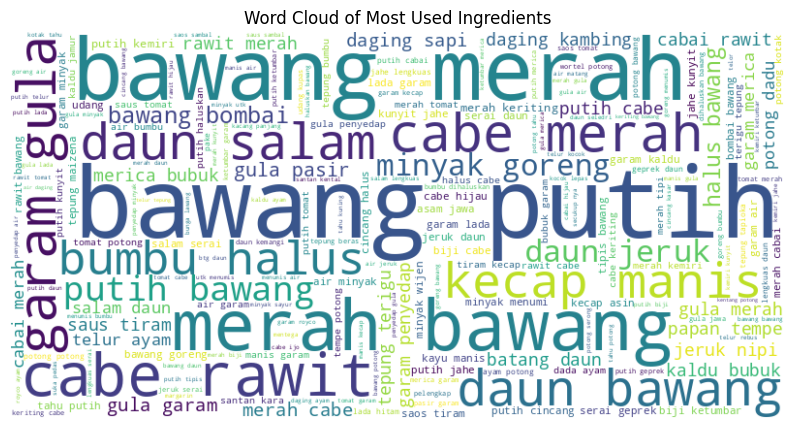

In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_ingredients_text = ' '.join(df_recipes['Ingredients Cleaned'].astype(str))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_ingredients_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Most Used Ingredients')
plt.axis('off')
plt.show()

## 3.2 Most Loved Recipes

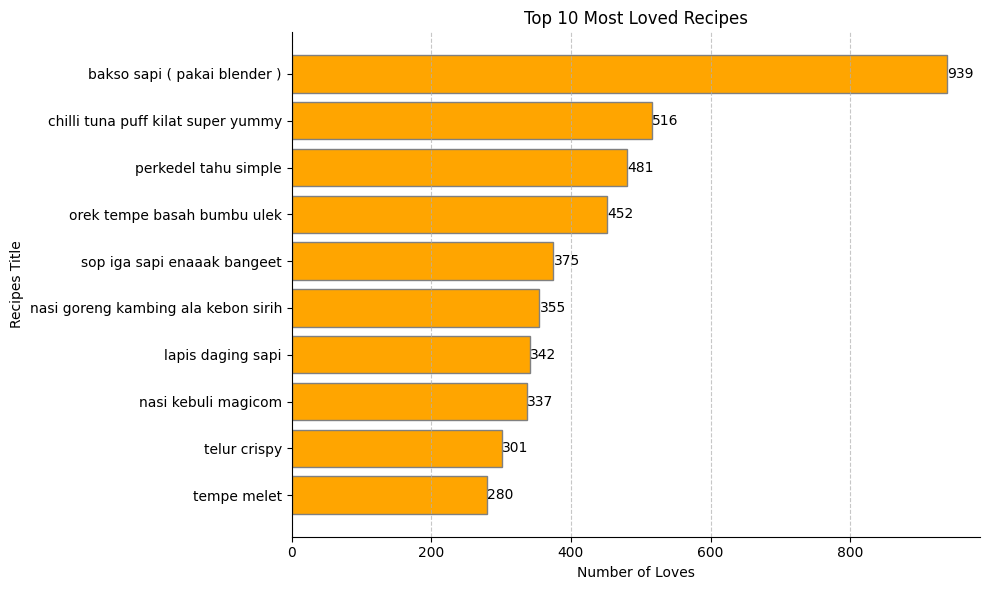

In [34]:
top_10_loved_recipes = df_recipes.sort_values(by='Loves', ascending=False).head(10)

plt.figure(figsize=(10, 6))
bars = plt.barh(top_10_loved_recipes['Title Cleaned'], top_10_loved_recipes['Loves'], color='orange', edgecolor='grey')
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width()}',
             va='center', ha='left', fontsize=10, color='black')
plt.xlabel('Number of Loves')
plt.ylabel('Recipes Title')
plt.title('Top 10 Most Loved Recipes')

plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## 3.3 Recipes with Most Ingredients

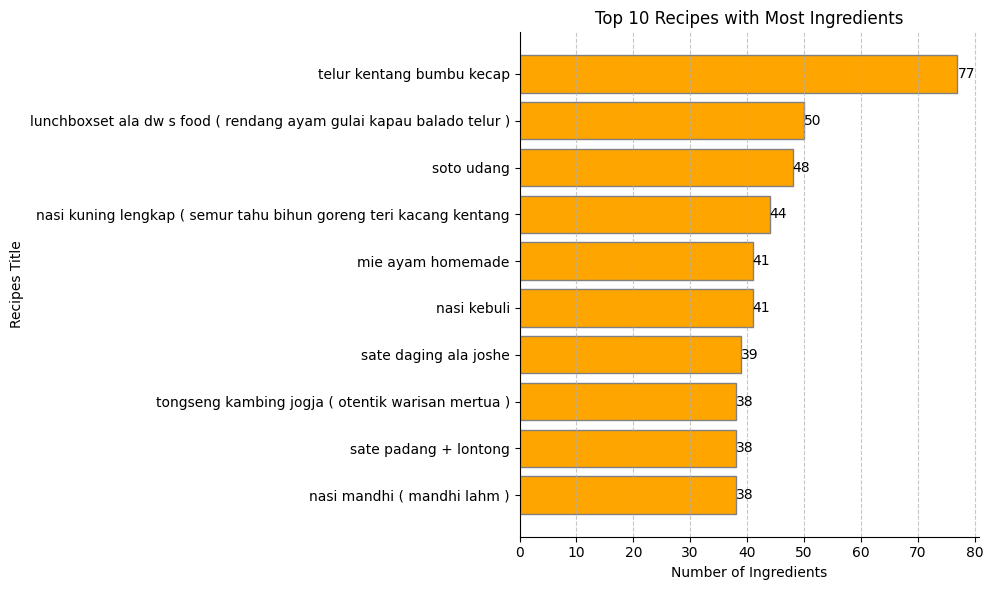

In [35]:
top_10_ingredients_recipes = df_recipes.sort_values(by='Total Ingredients', ascending=False).head(10)

plt.figure(figsize=(10, 6))
bars = plt.barh(top_10_ingredients_recipes['Title Cleaned'], top_10_ingredients_recipes['Total Ingredients'], color='orange', edgecolor='grey')

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.0f}',
             va='center', ha='left', fontsize=10, color='black')

plt.xlabel('Number of Ingredients')
plt.ylabel('Recipes Title')
plt.title('Top 10 Recipes with Most Ingredients')

plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## 3.4 Recipes with Most Steps

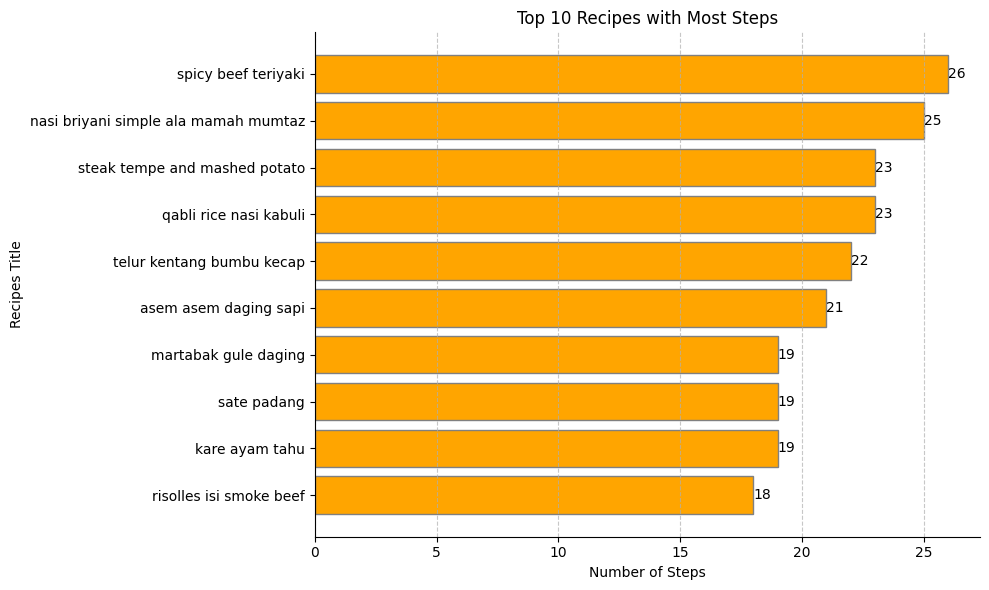

In [36]:
top_10_steps_recipes = df_recipes.sort_values(by='Total Steps', ascending=False).head(10)

plt.figure(figsize=(10, 6))
bars = plt.barh(top_10_steps_recipes['Title Cleaned'], top_10_steps_recipes['Total Steps'], color='orange', edgecolor='grey')

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.0f}',
             va='center', ha='left', fontsize=10, color='black')

plt.xlabel('Number of Steps')
plt.ylabel('Recipes Title')
plt.title('Top 10 Recipes with Most Steps')

plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## 3.5 Most Used Spices in Recipes

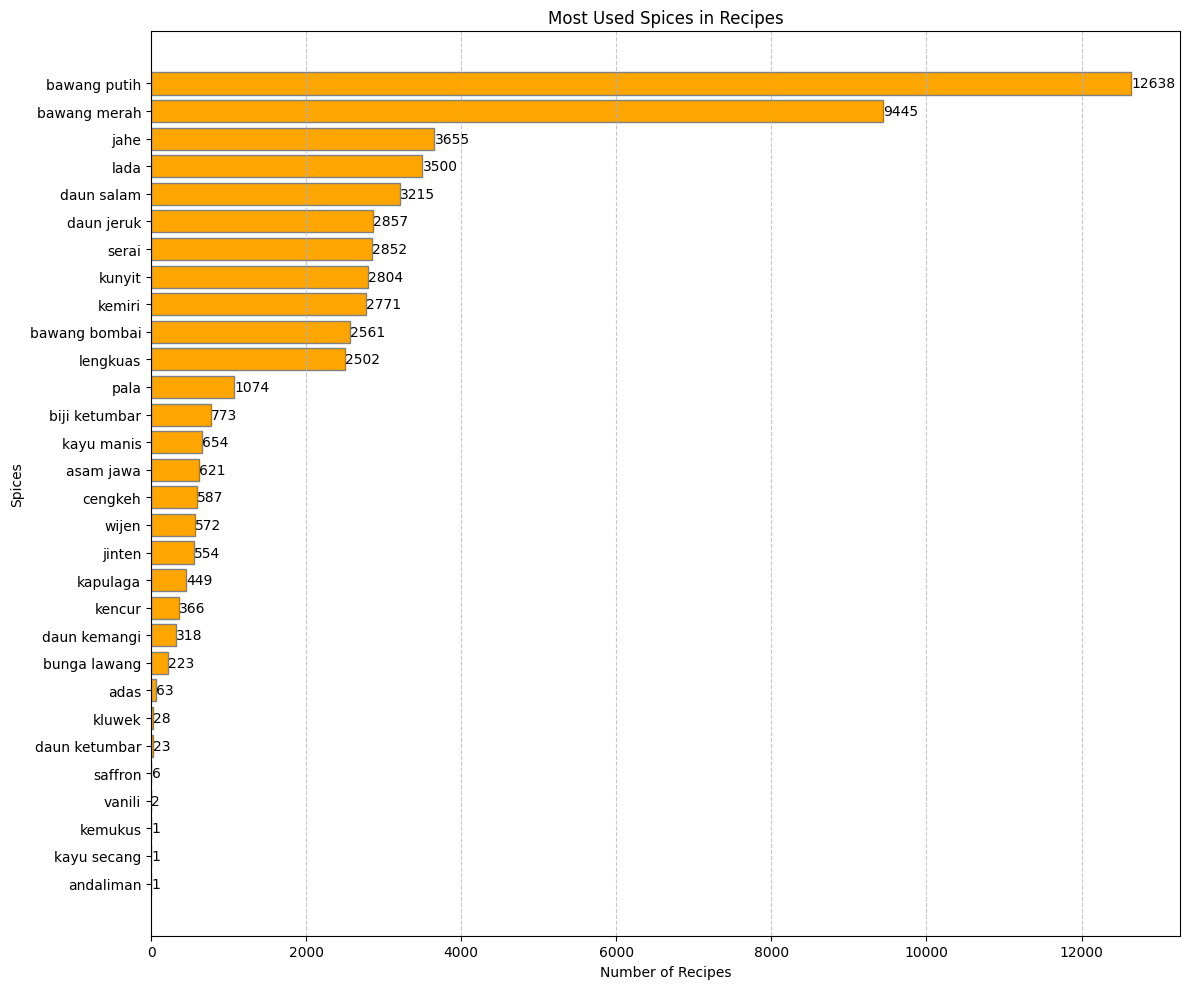

In [37]:
list_of_spices = ['adas', 'andaliman', 'asam jawa', 'bawang bombai', 'bawang merah', 'bawang putih', 'biji ketumbar',
                       'bunga lawang', 'cengkeh', 'daun jeruk', 'daun kemangi', 'daun ketumbar', 'daun salam', 'jahe',
                       'jinten', 'kapulaga', 'kayu manis', 'kayu secang', 'kemiri', 'kemukus', 'kencur', 'kluwek',
                       'kunyit', 'lada', 'lengkuas', 'pala', 'saffron', 'serai', 'vanili', 'wijen']

ingredient_count = {ingredient: 0 for ingredient in list_of_spices}

for ingredients in df_recipes['Ingredients Cleaned']:
    for ingredient in ingredient_count:
        if ingredient in ingredients:
            ingredient_count[ingredient] += 1

df_counts = pd.DataFrame(list(ingredient_count.items()), columns=['Spices', 'Number of Recipes'])
df_counts = df_counts.sort_values(by='Number of Recipes', ascending=False)

plt.figure(figsize=(12, 10))
bars = plt.barh(df_counts['Spices'], df_counts['Number of Recipes'], color='orange', edgecolor='grey')

for bar in bars:
    plt.text(bar.get_width() + 0.3, bar.get_y() + bar.get_height()/2, f'{bar.get_width():.0f}', ha='left', va='center', fontsize=10)

plt.xlabel('Number of Recipes')
plt.ylabel('Spices')
plt.title('Most Used Spices in Recipes')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 4. Dataset Export

In [38]:
data_recipes = 'Indonesian_Food_Recipes.csv'
df_recipes.to_csv(data_recipes, index=False)

print("Data has been saved as", data_recipes)

Data has been saved as Indonesian_Food_Recipes.csv


In [39]:
files.download('Indonesian_Food_Recipes.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>